In [4]:
import torch
from pytorch_lightning import Trainer
from models.vanilla_vae import VanillaVAE  # Adjust the import path as necessary
from dataset import VAEDataset  # Adjust the import path as necessary
from torch.utils.data import DataLoader
import numpy as np

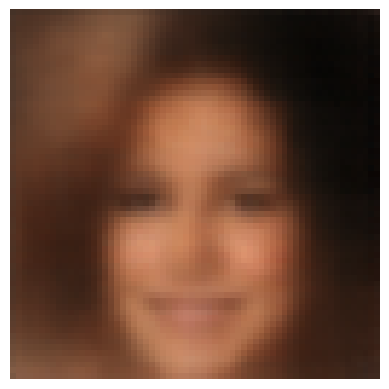

In [18]:


# Define the model parameters (these should match the parameters used during training)
in_channels = 3  # Example: 3 for RGB images
latent_dim = 128  # Example: latent dimension size

# Define the path to the checkpoint
checkpoint_path = 'logs/VanillaVAE/version_11/checkpoints/epoch=1-step=5088.ckpt'  # Replace with the actual path to your checkpoint file
checkpoint = torch.load(checkpoint_path)
state_dict = checkpoint['state_dict']
new_state_dict = {}
for k, v in state_dict.items():
    if k.startswith('model.'):
        new_state_dict[k[6:]] = v  # Remove 'model.' prefix
    else:
        new_state_dict[k] = v
model = VanillaVAE(in_channels=in_channels, latent_dim=latent_dim)

# Load the model from the checkpoint
model.load_state_dict(new_state_dict)

# Set the model to evaluation mode
model.eval()

# Move the model to the appropriate device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

img = model.sample(num_samples=1,current_device=device)  # Call the sample method to generate new images

import matplotlib.pyplot as plt

# Convert the tensor to a numpy array and transpose the dimensions to (H, W, C)
img_np = img.cpu().detach().numpy().squeeze()
img_np = img_np.transpose(1, 2, 0)

# Clip the values to be in the range [0, 1]
img_np = np.clip(img_np, 0, 1)

# Display the image
plt.imshow(img_np)
plt.axis('off')  # Turn off axis
plt.show()

In [6]:
samples = model.sample(1, current_device=device)
print(samples)

tensor([[[[0.1006, 0.0839, 0.0834,  ..., 0.0790, 0.0829, 0.0964],
          [0.0838, 0.0617, 0.0574,  ..., 0.0498, 0.0375, 0.0432],
          [0.0755, 0.0579, 0.0581,  ..., 0.0448, 0.0413, 0.0511],
          ...,
          [0.0753, 0.0558, 0.0526,  ..., 0.3183, 0.2997, 0.2917],
          [0.0931, 0.0438, 0.0473,  ..., 0.3245, 0.3233, 0.3223],
          [0.1093, 0.0639, 0.0587,  ..., 0.3487, 0.3390, 0.3209]],

         [[0.0808, 0.0681, 0.0714,  ..., 0.0617, 0.0677, 0.0731],
          [0.0673, 0.0543, 0.0502,  ..., 0.0435, 0.0368, 0.0385],
          [0.0568, 0.0529, 0.0501,  ..., 0.0444, 0.0400, 0.0386],
          ...,
          [0.0621, 0.0526, 0.0491,  ..., 0.2862, 0.2643, 0.2590],
          [0.0660, 0.0384, 0.0374,  ..., 0.2960, 0.2856, 0.2841],
          [0.0982, 0.0492, 0.0449,  ..., 0.3154, 0.2984, 0.2851]],

         [[0.0667, 0.0630, 0.0591,  ..., 0.0599, 0.0677, 0.0731],
          [0.0580, 0.0469, 0.0429,  ..., 0.0407, 0.0366, 0.0388],
          [0.0458, 0.0452, 0.0416,  ..., 0